# analysis

In [51]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import networkx as nx
import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [16]:
df_stats = pd.read_csv(r"..\data\stats.csv")
df_stats

player          レート  出場数  総試合数  総全消し戦数        勝率      先手勝率      後手勝率  \
0      Acliv  1476.575341    1     5       1  0.200000  0.200000  0.000000   
1   Kamestry  1502.075456   12   163      12  0.460123  0.489130  0.422535   
2     Kuroro  1463.321577    9   102      11  0.509804  0.608696  0.428571   
3    MATTYAN  1468.795676   16   199      11  0.452261  0.465116  0.428571   
4        MGR  1528.252150    9   174       9  0.522989  0.578313  0.472527   
5       Nero  1499.879264    1     8       1  0.500000  0.666667  0.400000   
6       SAKI  1614.494483   21   531      49  0.529190  0.574675  0.466368   
7    Shiyota  1555.595996    8   146      12  0.506849  0.521739  0.493506   
8       Tema  1385.113282    9    57       1  0.280702  0.333333  0.242424   
9        Tom  1575.147714   13   329      29  0.519757  0.567708  0.452555   
10       coo  1512.798192   11   144      13  0.479167  0.534247  0.422535   
11     delta  1607.637422   24   632      34  0.575949  0.584906  0.569482   
12      fron  1443.559867   21   439      29  0.505695  0.524324  0.492126   
13    kuroro  1508.813024    2    13       1  0.615385  0.800000  0.500000   
14      live  1567.248980   24   584      33  0.515411  0.535948  0.492806   
15      meta  1463.915323   15   229      19  0.432314  0.438776  0.427481   
16   momoken  1563.087960    1    30       3  0.600000  0.681818  0.375000   
17       oka  1476.435740   11    93       6  0.419355  0.461538  0.365854   
18     reoru  1474.615750    2    57       3  0.333333  0.380952  0.305556   
19     selva  1484.907394   15   231      14  0.471861  0.504065  0.435185   
20     tekku  1452.080428    1    45       3  0.333333  0.263158  0.384615   
21     あかじこう  1519.662252    1    12       0  0.666667  0.625000  0.750000   
22       あべし  1472.516103    1     4       0  0.000000  0.000000  0.000000   
23  あめみやたいよう  1485.513156    9    94       8  0.436170  0.434783  0.437500   
24       いさな  1441.022234   10   128       4  0.390625  0.491525  0.304348   
25      かすみん  1496.202499    1    16       0  0.437500  0.555556  0.285714   
26     くまちょむ  1474.496266   19   332      50  0.490964  0.494318  0.487179   
27       ざいろ  1497.492053   16   199      10  0.442211  0.471698  0.408602   
28      せたなぎ  1504.331004   15   266      22  0.466165  0.486111  0.442623   
29    ちゃるめらー  1507.245175    1    19       1  0.526316  0.545455  0.500000   
30      ともくん  1645.368779   24   821      67  0.563946  0.584656  0.546275   
31      とりぱん  1480.064922    1    17       1  0.411765  0.555556  0.250000   
32       のたこ  1497.038065    1    11       0  0.545455  0.500000  0.600000   
33      のらすけ  1496.841368    1    18       5  0.444444  0.375000  0.500000   
34     ひらかいと  1444.794945    1    12       1  0.166667  0.500000  0.000000   
35      ぴぽにあ  1518.936214   25   709      50  0.551481  0.550459  0.552356   
36     へーょまは  1444.348344   12   160      11  0.406250  0.406780  0.405941   
37     ぺペペマン  1521.266384    1     6       0  0.666667  0.800000  0.000000   
38        むー  1472.996434    6   101       9  0.386139  0.481481  0.276596   
39      めいせつ  1389.021864   12    74       5  0.297297  0.411765  0.200000   
40       もこう  1459.671153    3    19       3  0.315789  0.333333  0.300000   
41       やなせ  1443.774735   10    88       4  0.409091  0.333333  0.478261   
42    やまたけプロ  1466.422041    1     4       0  0.000000  0.000000  0.000000   
43       やまだ  1492.754825    1    19       1  0.473684  0.500000  0.454545   
44       ゆうき  1543.412642    1    19       1  0.473684  0.444444  1.000000   
45      わっふる  1533.067686   11   124       9  0.516129  0.485294  0.553571   
46      タイタン  1537.277838   14   218      20  0.486239  0.568421  0.422764   
47      トムソン  1448.379304    6    47       3  0.404255  0.448276  0.333333   
48     ペペペマン  1434.141844    5    31       3  0.290323  0.333333  0.230769   
49      マッキー  1604.677092   13   487      32  0.548255  0.547718  0.548780   
50     ヨダソウマ  1502.274008   

### EDA

In [23]:
df_stats.describe()
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        57 non-null     object 
 1   レート           57 non-null     float64
 2   出場数           57 non-null     int64  
 3   総試合数          57 non-null     int64  
 4   総全消し戦数        57 non-null     int64  
 5   勝率            57 non-null     float64
 6   先手勝率          57 non-null     float64
 7   後手勝率          57 non-null     float64
 8   先手率           57 non-null     float64
 9   中期決着勝率        57 non-null     float64
 10  先打ち本線勝率       57 non-null     float64
 11  全消し戦カウンター勝率   57 non-null     float64
 12  全消し戦相殺勝率      57 non-null     float64
 13  後打ち本線勝率       57 non-null     float64
 14  早期決着勝率        57 non-null     float64
 15  中期決着試合数       57 non-null     int64  
 16  先打ち本線試合数      57 non-null     int64  
 17  全消し戦カウンター試合数  57 non-null     int64  
 18  全消し戦相殺試合数     57 non-null     in

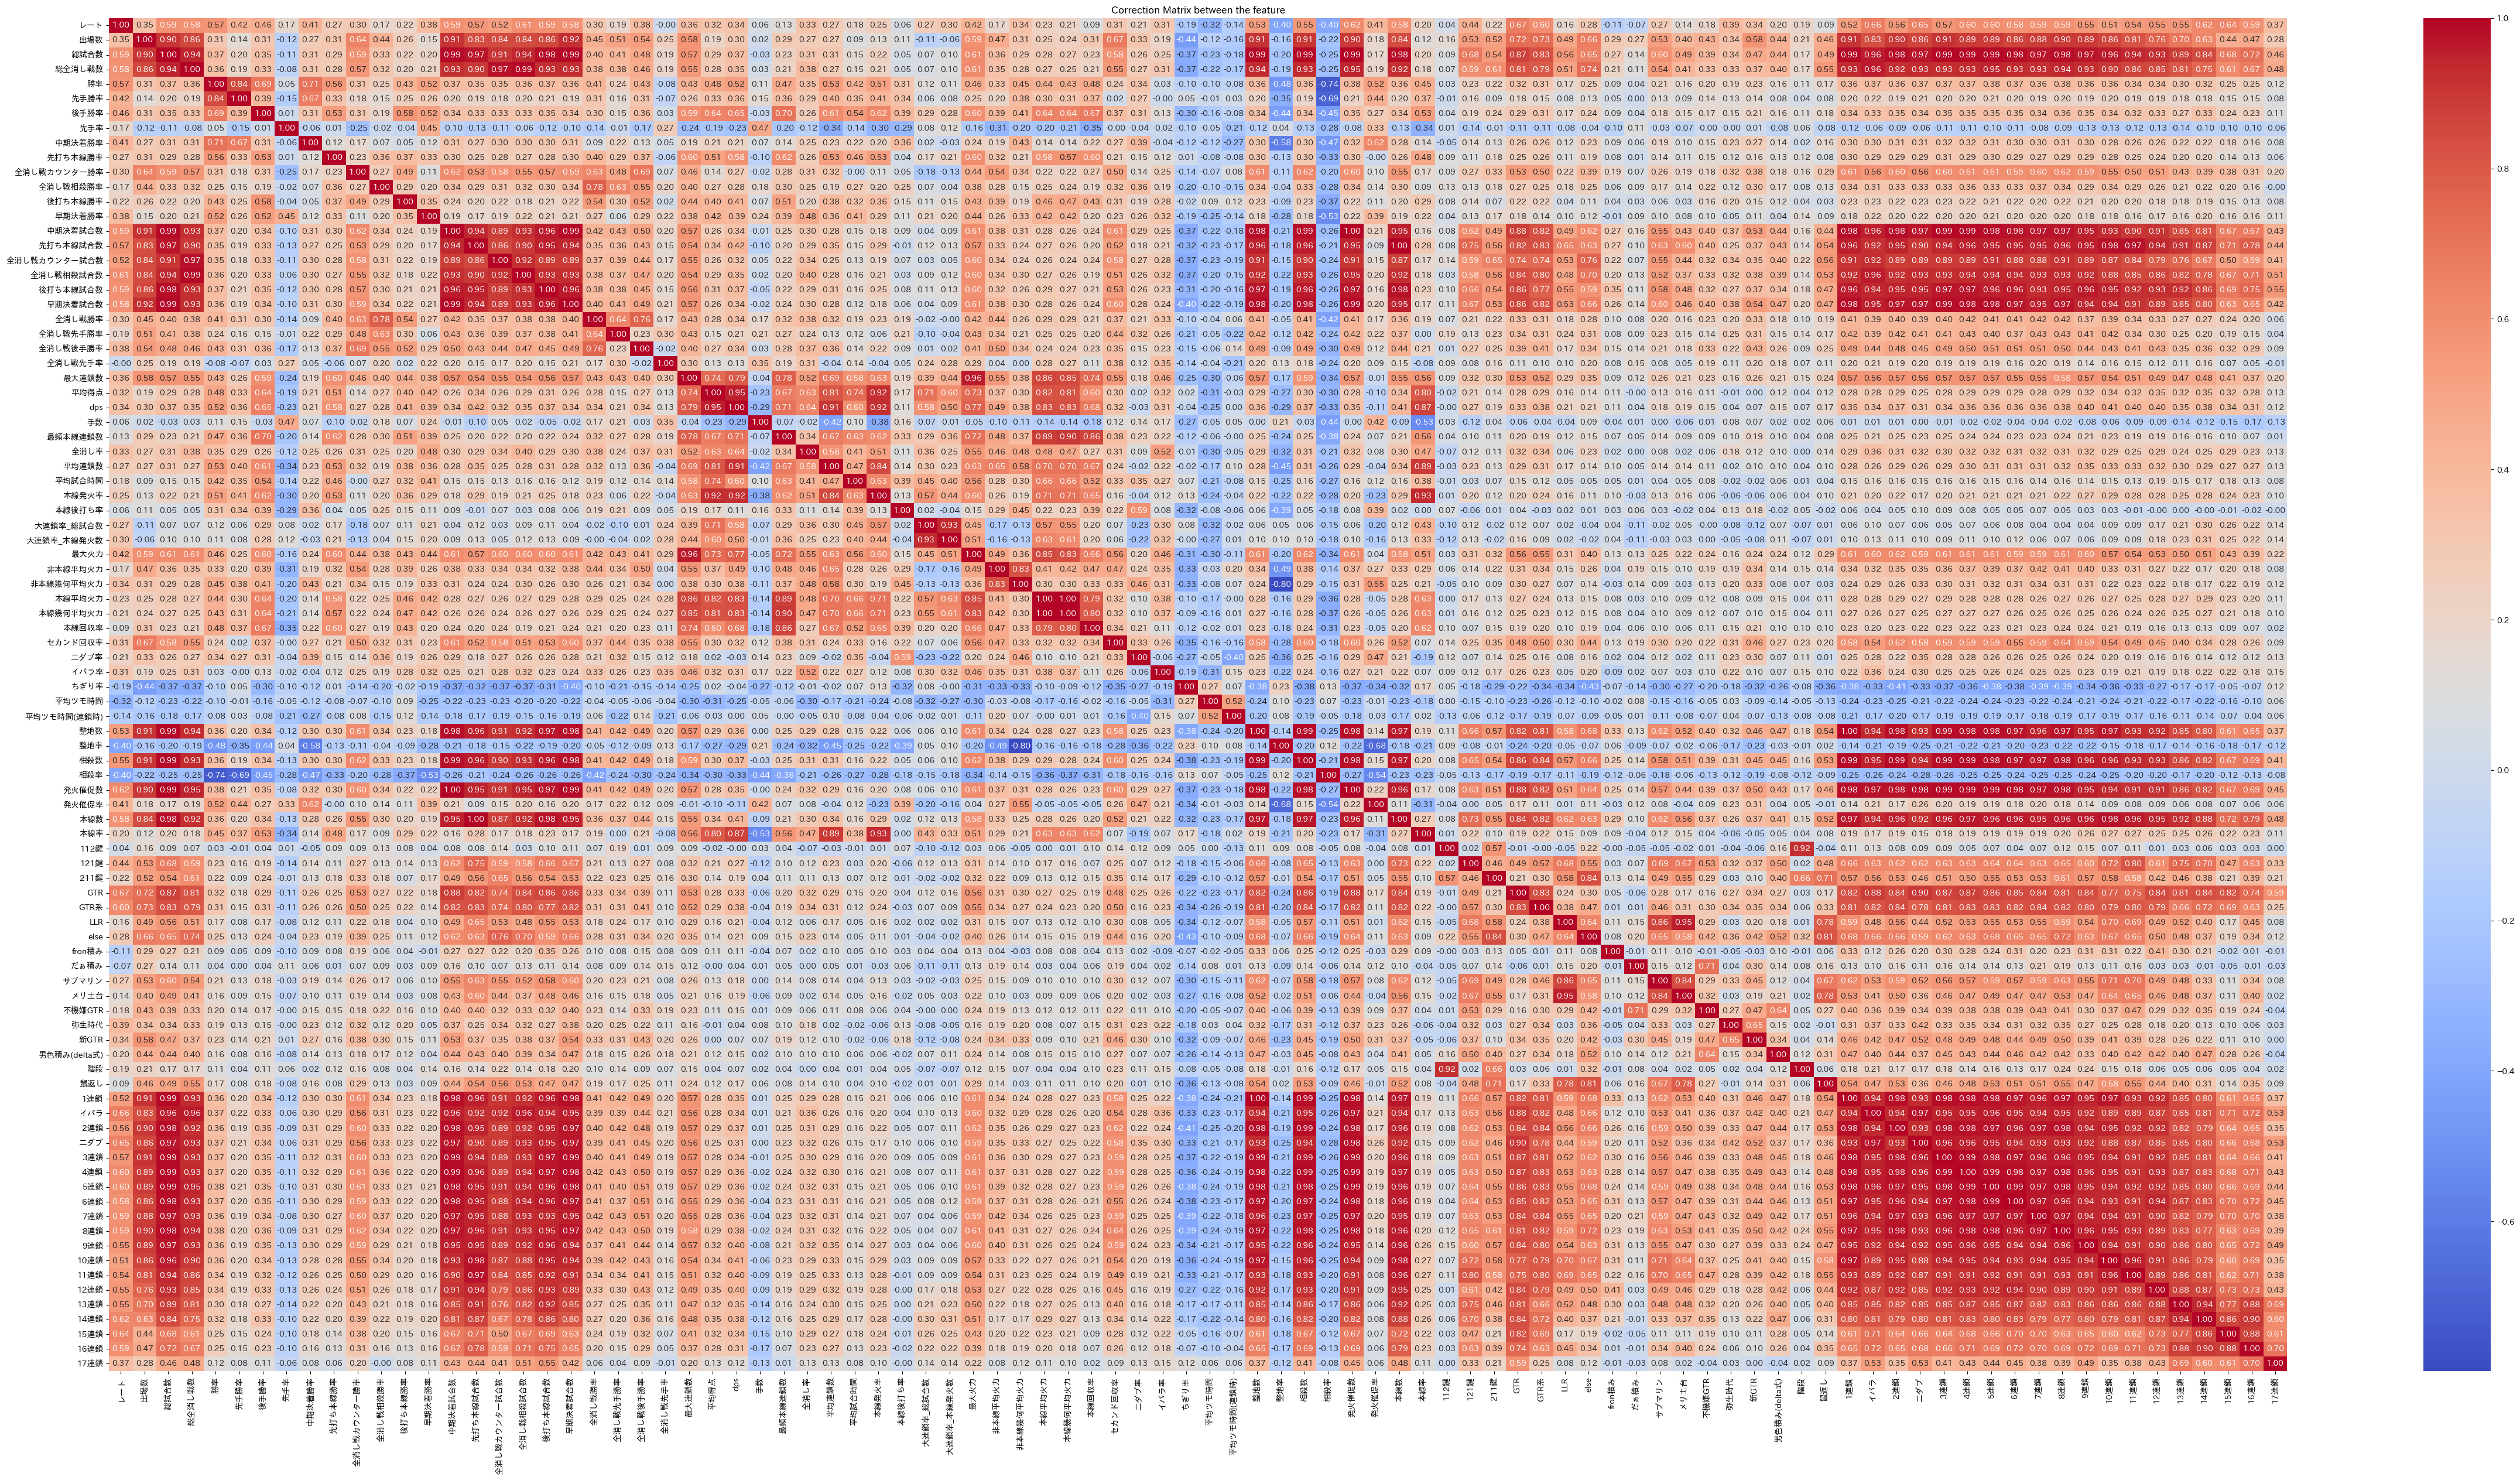

In [27]:
column_to_exclude = "player" #player名を除外
df_filtered = df_stats.drop(columns=[column_to_exclude])

plt.figure(figsize=(60,30))
sns.heatmap(df_filtered.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correction Matrix between the feature")
plt.show()

#### ここから上位特徴量について

C:\Users\tk_ta\AppData\Local\Temp\ipykernel_31468\65548389.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_var1.values, y=corr_with_var1.index, ax=axes[0], palette='Blues_d')
C:\Users\tk_ta\AppData\Local\Temp\ipykernel_31468\65548389.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_var2.values, y=corr_with_var2.index, ax=axes[1], palette='Greens_d')


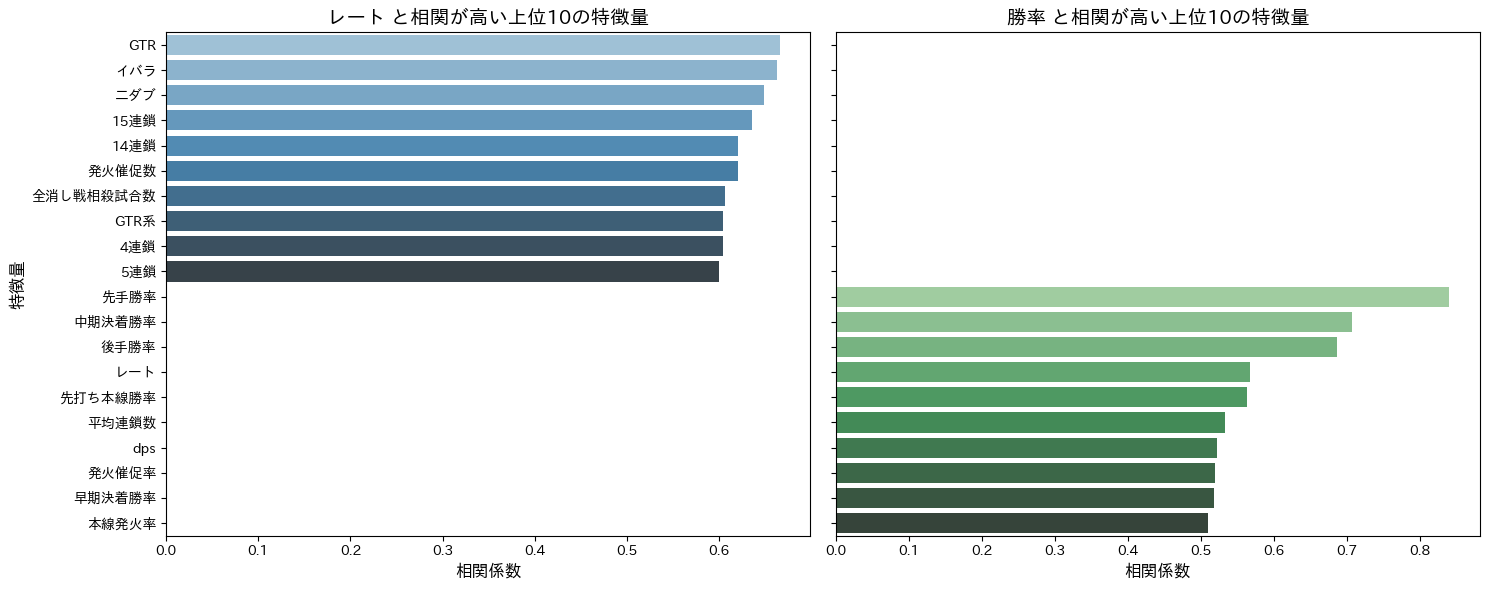

In [64]:
# 仮定: df_filtered は特徴量のみのデータフレーム
# 相関の基準となる変数名
variable_1 = 'レート'  # 相関を計算したい変数1
variable_2 = '勝率'  # 相関を計算したい変数2
k = 10  # 上位k個を表示

# 変数1との相関が高い上位k個を取得
corr_with_var1 = df_filtered.corr()[variable_1].sort_values(ascending=False).iloc[1:k+1]

# 変数2との相関が高い上位k個を取得
corr_with_var2 = df_filtered.corr()[variable_2].sort_values(ascending=False).iloc[1:k+1]

# プロットの作成
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# 変数1との相関をプロット
sns.barplot(x=corr_with_var1.values, y=corr_with_var1.index, ax=axes[0], palette='Blues_d')
axes[0].set_title(f'{variable_1} と相関が高い上位{k}の特徴量', fontsize=14)
axes[0].set_xlabel('相関係数', fontsize=12)
axes[0].set_ylabel('特徴量', fontsize=12)

# 変数2との相関をプロット
sns.barplot(x=corr_with_var2.values, y=corr_with_var2.index, ax=axes[1], palette='Greens_d')
axes[1].set_title(f'{variable_2} と相関が高い上位{k}の特徴量', fontsize=14)
axes[1].set_xlabel('相関係数', fontsize=12)
axes[1].set_ylabel('')  # Yラベルは省略して見やすくする

# レイアウト調整
plt.tight_layout()
plt.show()

In [ ]:
# 上記で相関が高い特徴量をリスト化
top_features_var1 = corr_with_var1.index.tolist()  # variable_1 と相関が高い特徴量
top_features_var2 = corr_with_var2.index.tolist()  # variable_2 と相関が高い特徴量

selected_features = list(set(top_features_var1 + top_features_var2))

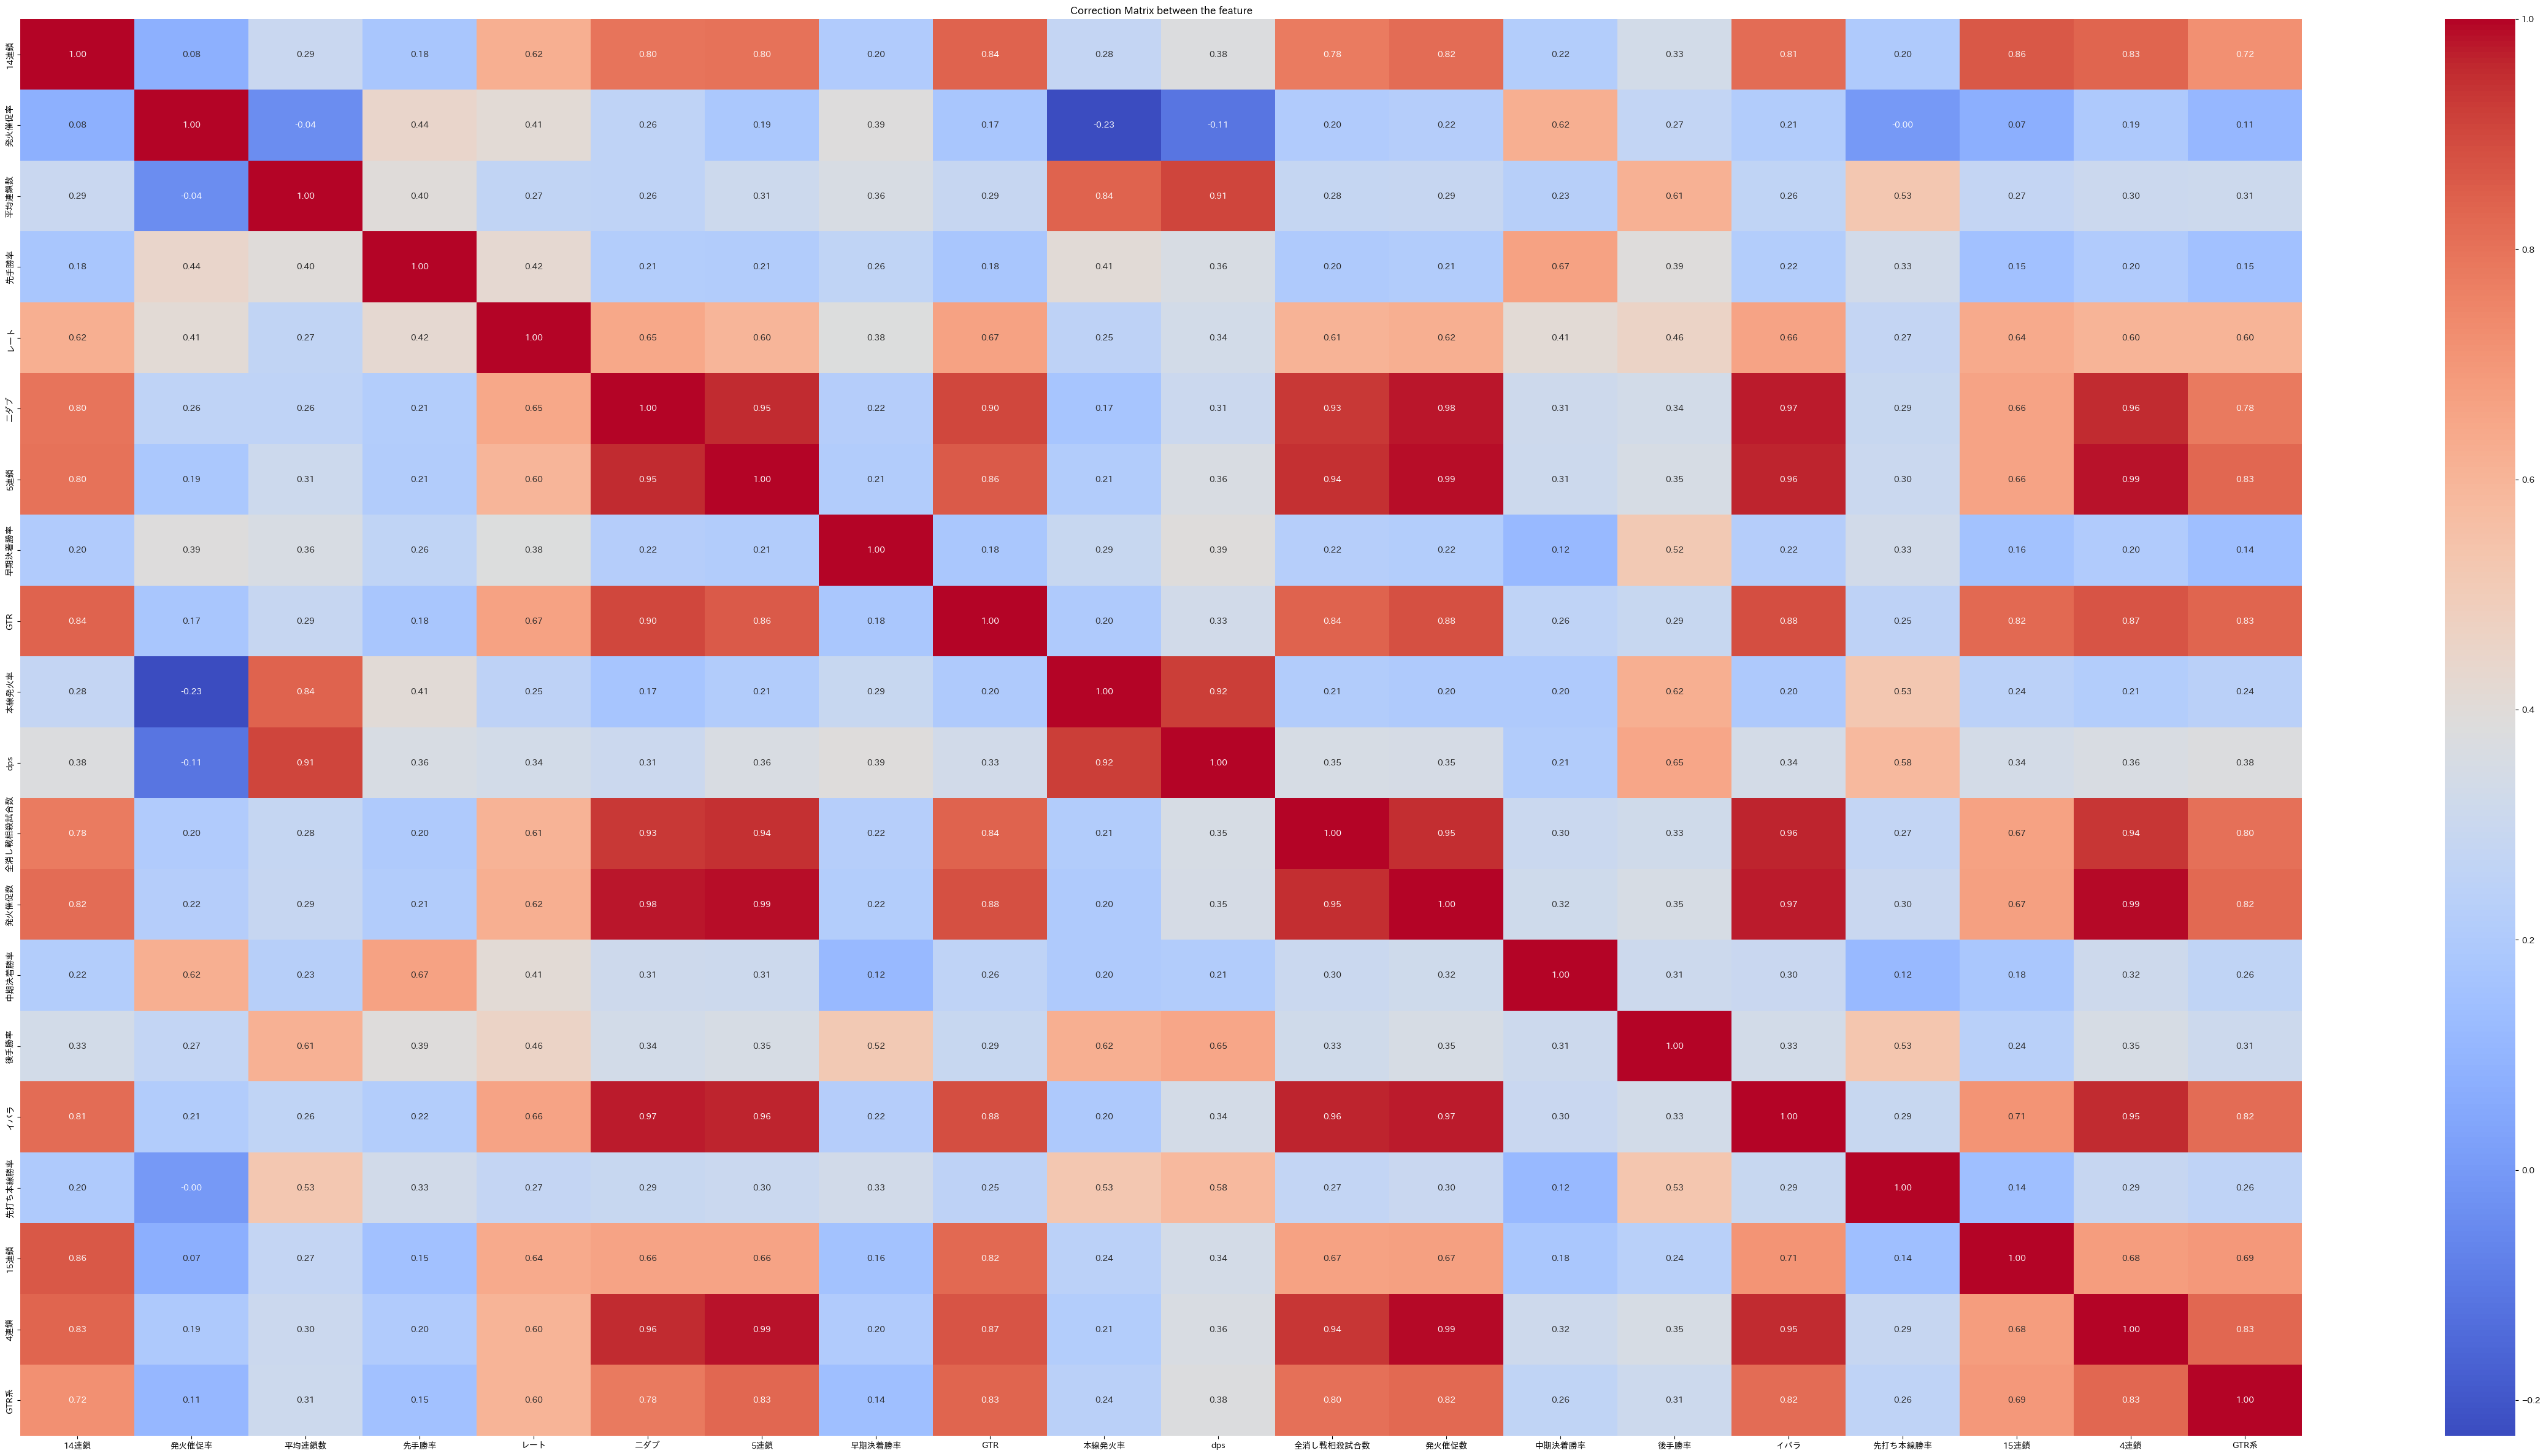

In [69]:
plt.figure(figsize=(60,30))
sns.heatmap(df_filtered[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correction Matrix between the feature")
plt.show()

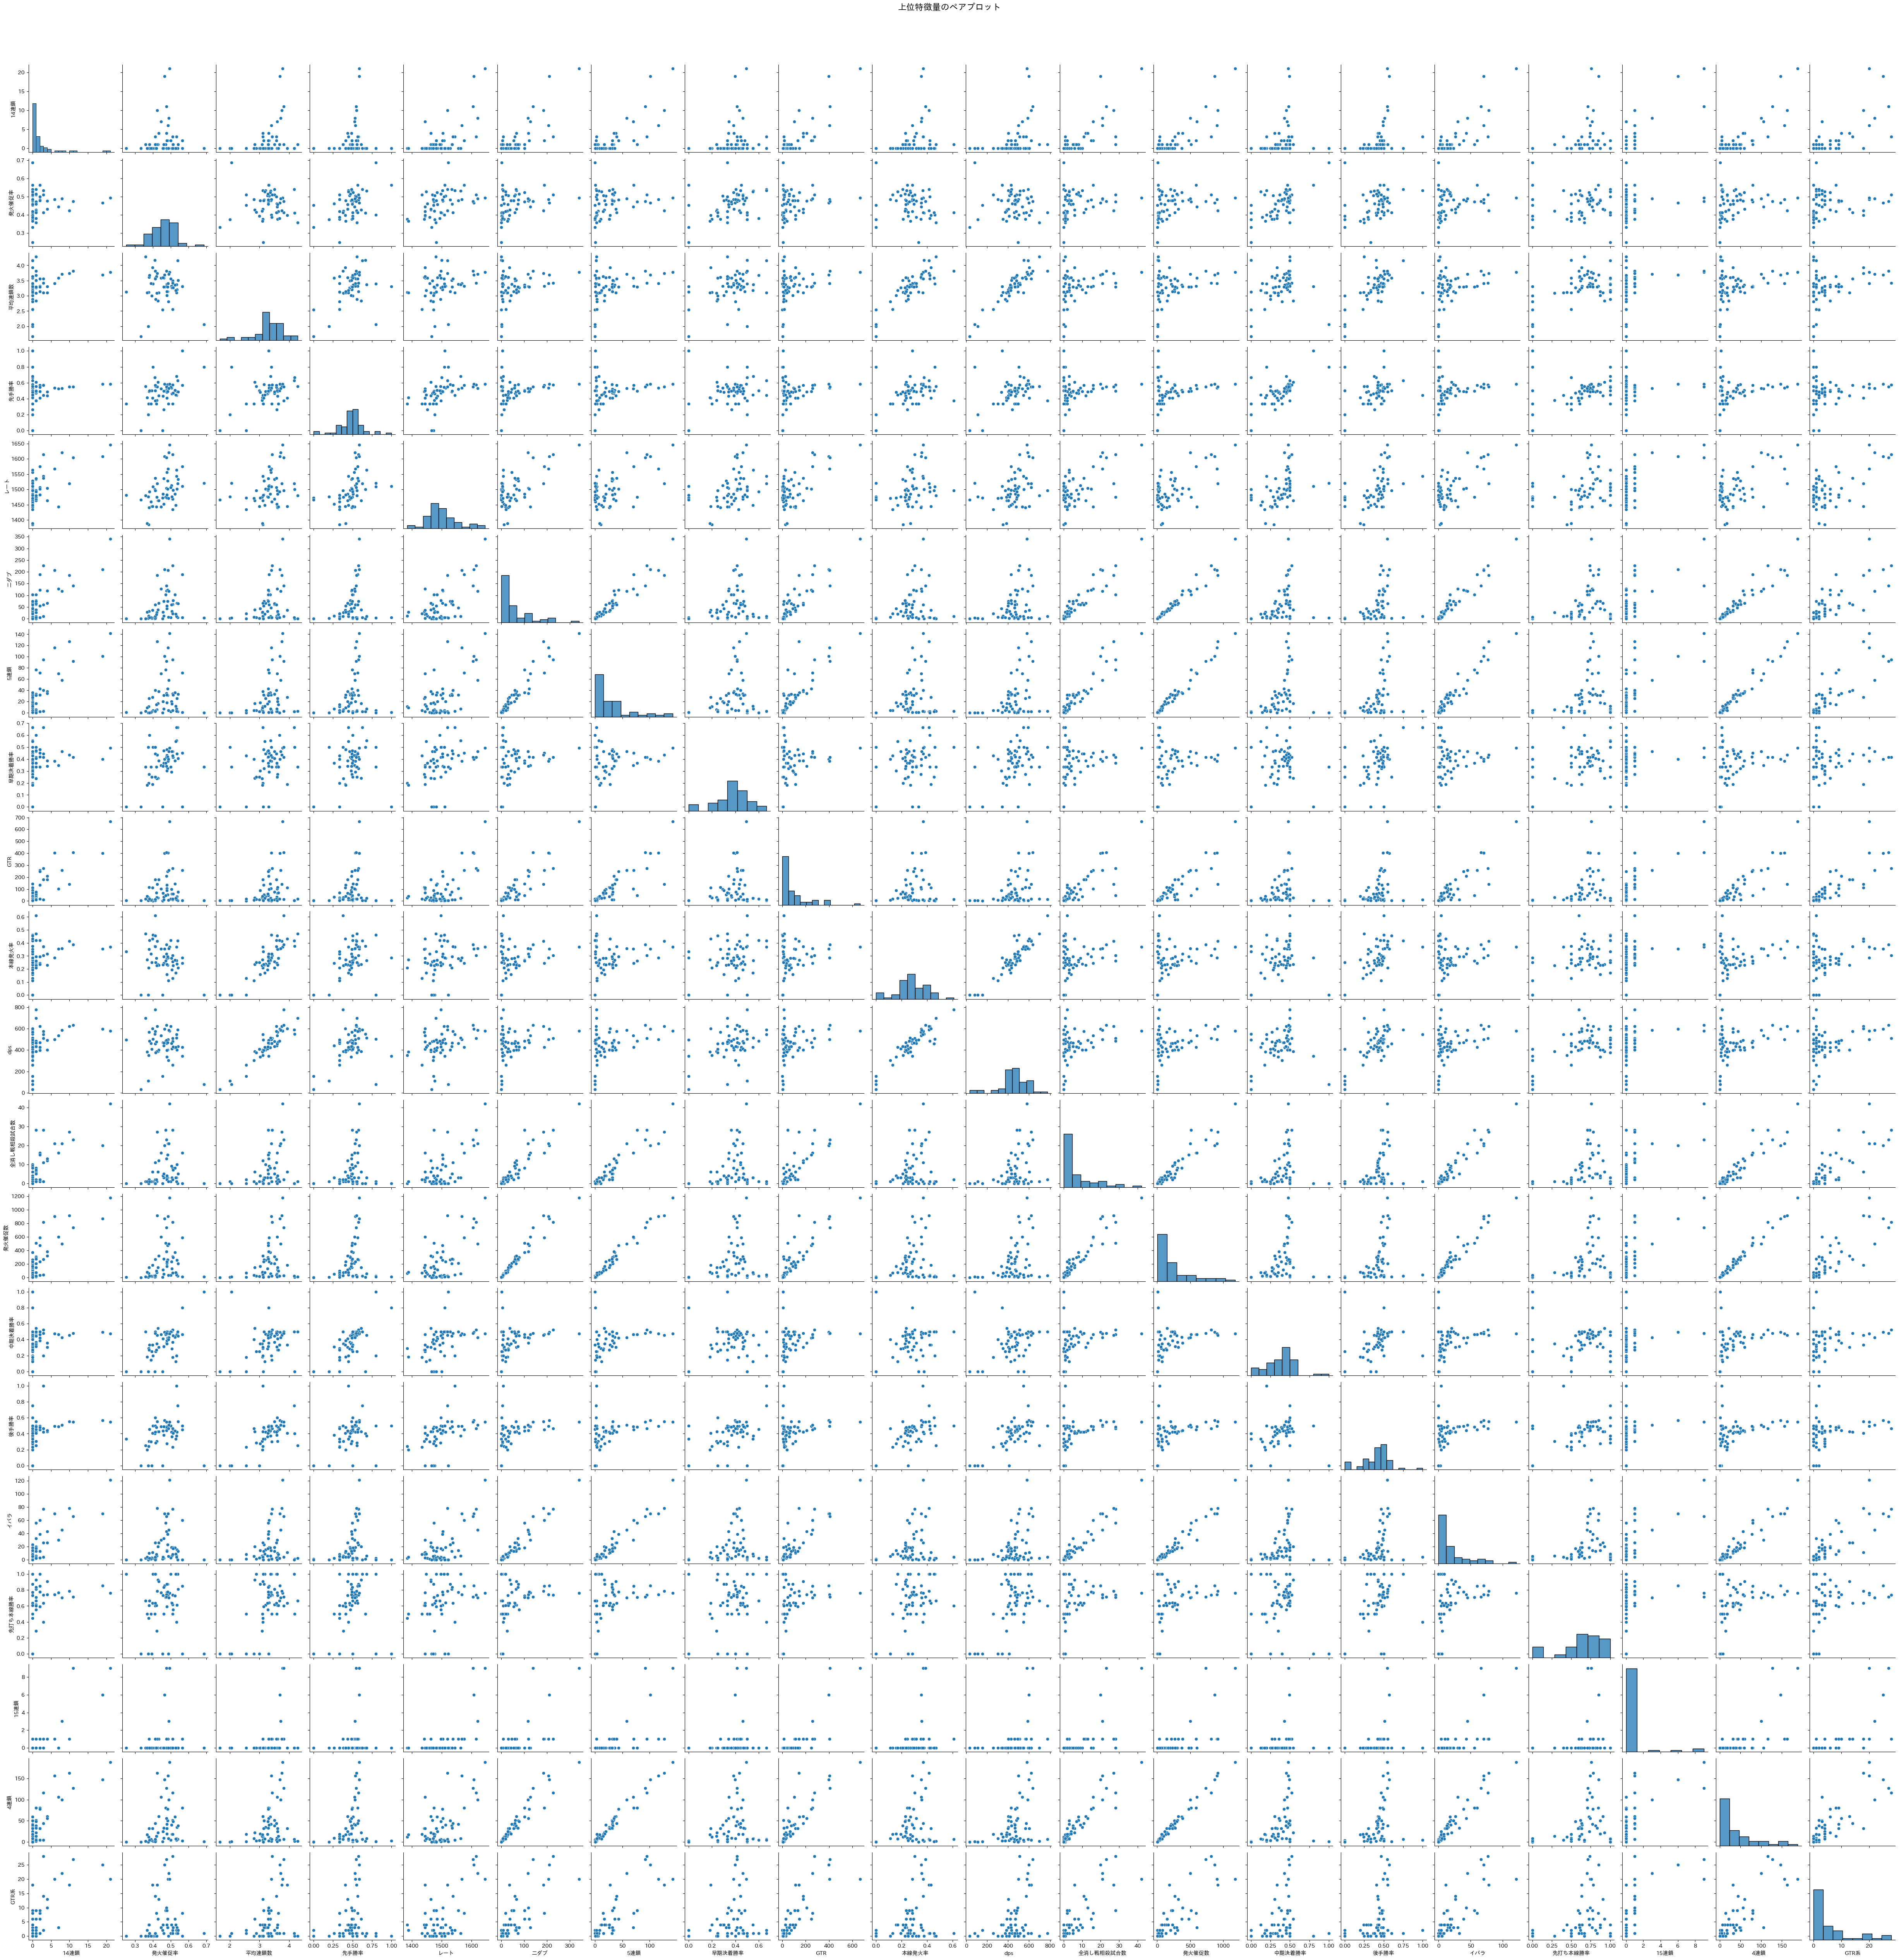

In [ ]:
sns.pairplot(df_filtered[selected_features])
plt.suptitle('上位特徴量のペアプロット', y=1.02, fontsize=16)  # 全体タイトルを追加
plt.show()

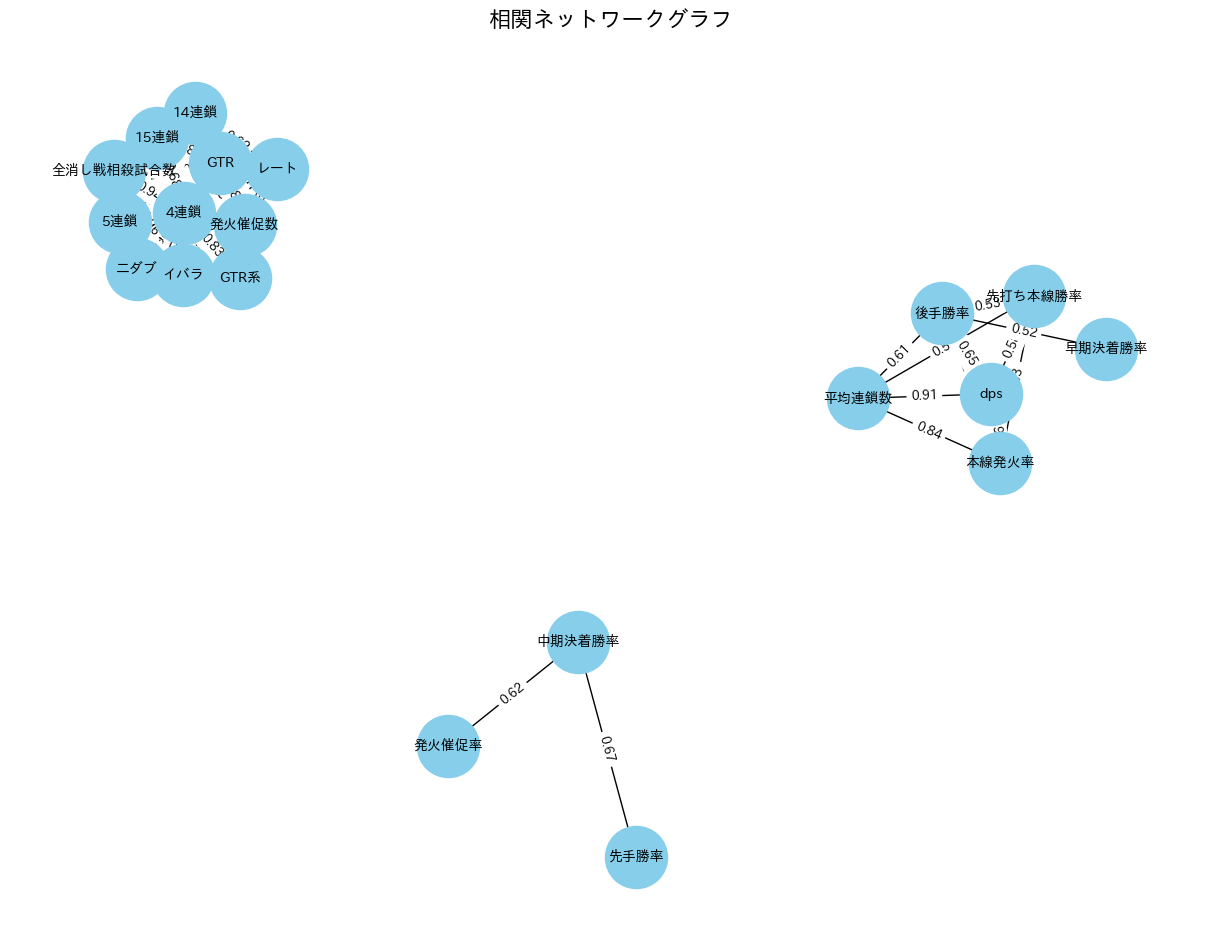

In [70]:
# 相関行列
corr_matrix = df_filtered[selected_features].corr()

# ネットワーク作成
G = nx.Graph()
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.5:  # 閾値を設定
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])

# プロット
pos = nx.spring_layout(G, seed=42, k=0.5)  # レイアウトを固定
plt.figure(figsize=(12, 9))

# ノードとラベルを描画（日本語対応）
nx.draw(
    G,
    pos,
    with_labels=True,
    labels={node: node for node in G.nodes()},  # ノードラベルを指定
    node_size=2000,
    node_color="skyblue",
    font_size=10,
    font_family="IPAexGothic"  # 日本語フォントを直接指定
)

# エッジラベルの描画（日本語対応）
edge_labels = {(i, j): f"{w['weight']:.2f}" for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_size=9,
    font_family="IPAexGothic"  # 日本語フォントを直接指定
)

plt.title("相関ネットワークグラフ", fontsize=16)
plt.show()

ここでfixする特徴量を指定

In [83]:
Fixed_feature_values = ["先手勝率", "中期決着勝率", "後手勝率", "レート"]

### レーダーチャート作成

レーダーチャートで採用する特徴量は以下で定義


1. **勝率と相関の高い特徴量**:
これは全選手fix

2. **ある選手が優れている特徴量**:
選手ごとにflexible

In [61]:
# ここで分析する選手を定義
player_column = 'player'
player_name = 'Tom'

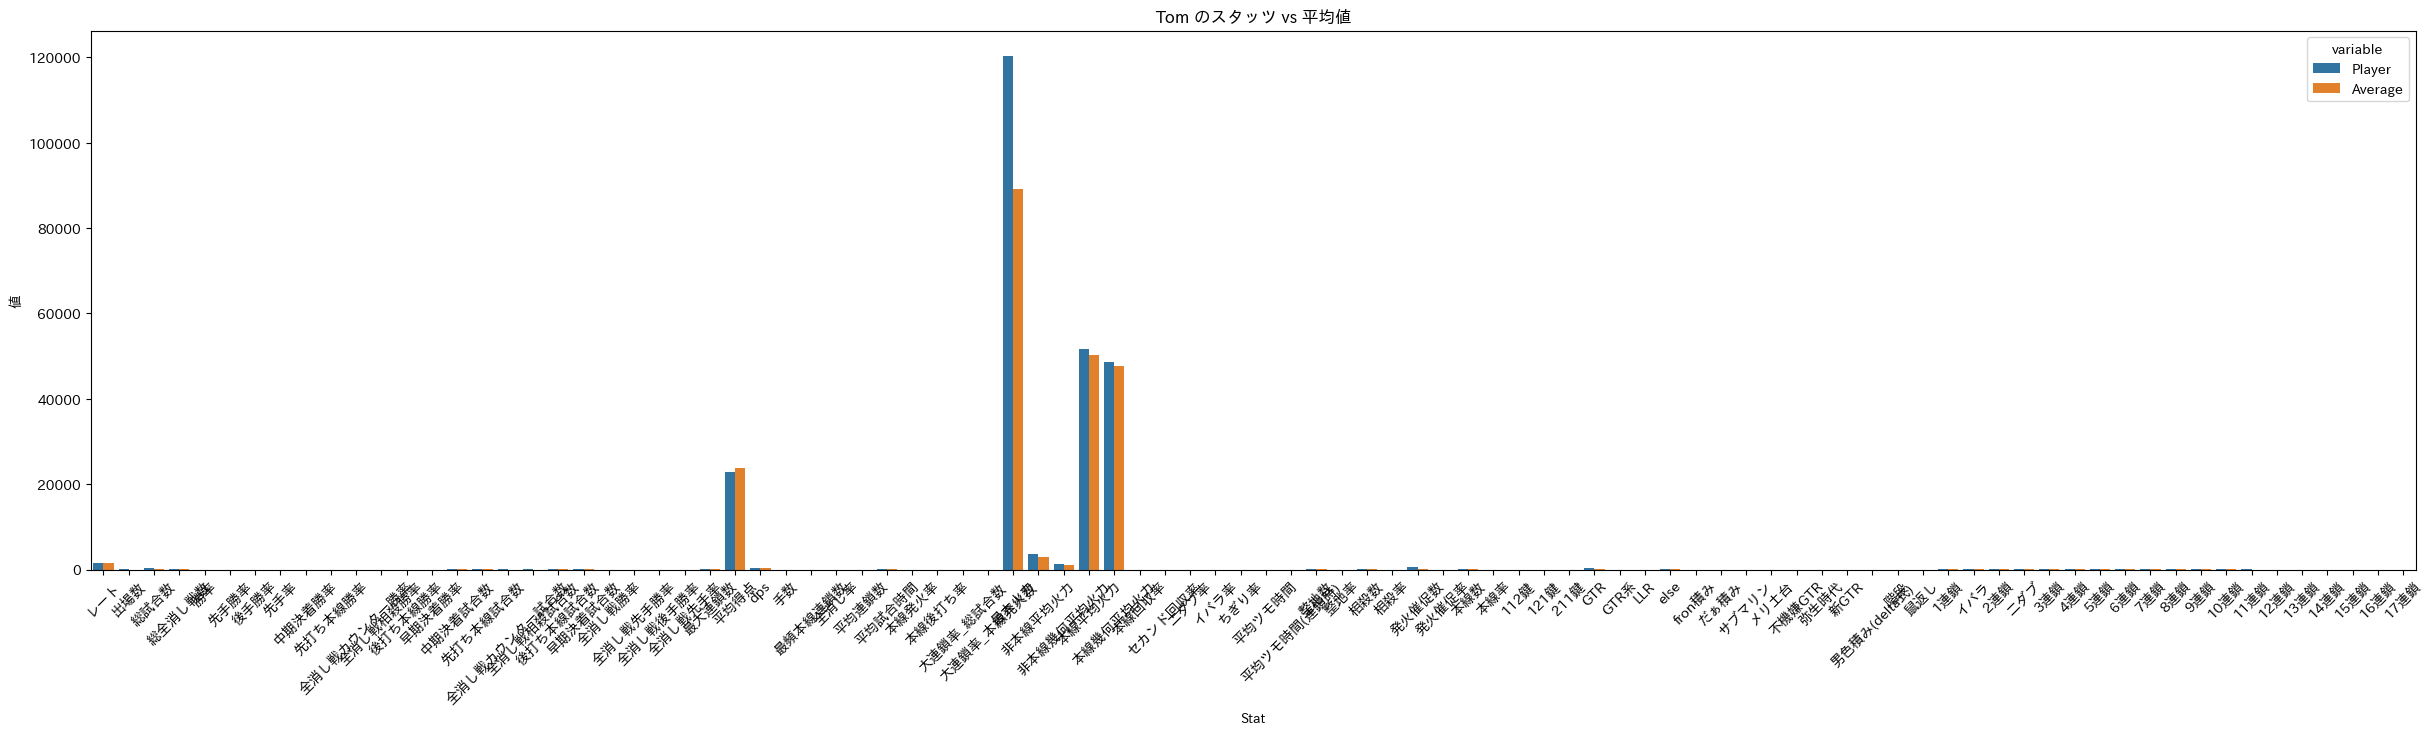

In [49]:
player_stats = df_stats[df_stats[player_column] == player_name].iloc[0]
player_stats_numeric = player_stats.drop(labels=[player_column])

# 平均値との比較
stats_mean = df_filtered.mean()

# 比較用データフレームの作成
comparison_df = pd.DataFrame({
    'Stat': df_filtered.columns,
    'Player': player_stats_numeric.values,
    'Average': stats_mean.values
})

# 比較の可視化
plt.figure(figsize=(30, 7))
sns.barplot(x='Stat', y='value', hue='variable', 
            data=pd.melt(comparison_df, id_vars=['Stat'], value_vars=['Player', 'Average']))
plt.title(f'{player_name} のスタッツ vs 平均値')
plt.xticks(rotation=45)
plt.ylabel('値')
plt.show()


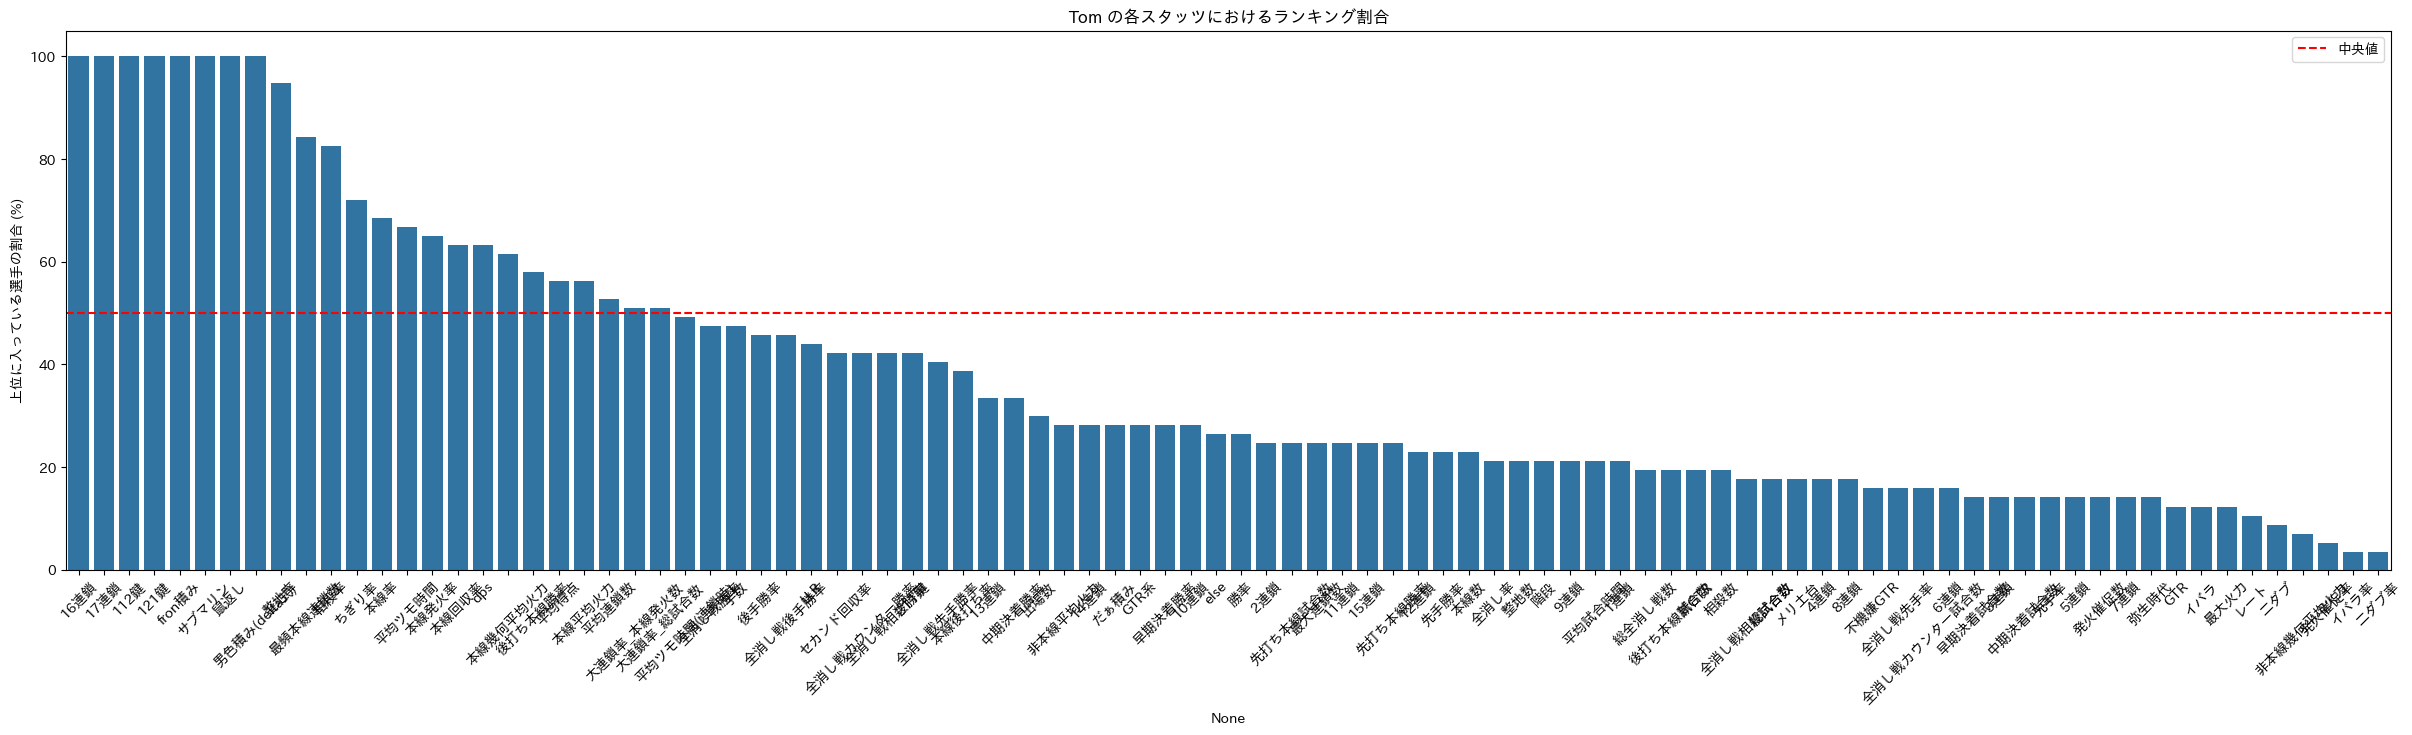

In [54]:
def stat_rankings(player_name, df_stats, df_filtered):
    player_stats = df_stats[df_stats[player_column] == player_name].iloc[0].drop(labels=[player_column])
    
    rankings = {}
    for stat in df_filtered.columns:
        rankings[stat] = (df_filtered[stat] >= player_stats[stat]).sum()
    
    rankings_df = pd.DataFrame.from_dict(rankings, orient='index', columns=['Rank'])
    rankings_df['Total Players'] = len(df_filtered)
    rankings_df['Percentage'] = rankings_df['Rank'] / rankings_df['Total Players'] * 100
    rankings_df = rankings_df.sort_values('Percentage', ascending=False)
    
    plt.figure(figsize=(30, 7))
    sns.barplot(x=rankings_df.index, y=rankings_df['Percentage'])
    plt.axhline(50, color='red', linestyle='--', label='中央値')
    plt.xticks(rotation=45)
    plt.ylabel('上位に入っている選手の割合 (%)')
    plt.title(f'{player_name} の各スタッツにおけるランキング割合')
    plt.legend()
    plt.show()

# ランキングの可視化
stat_rankings(player_name, df_stats, df_filtered)

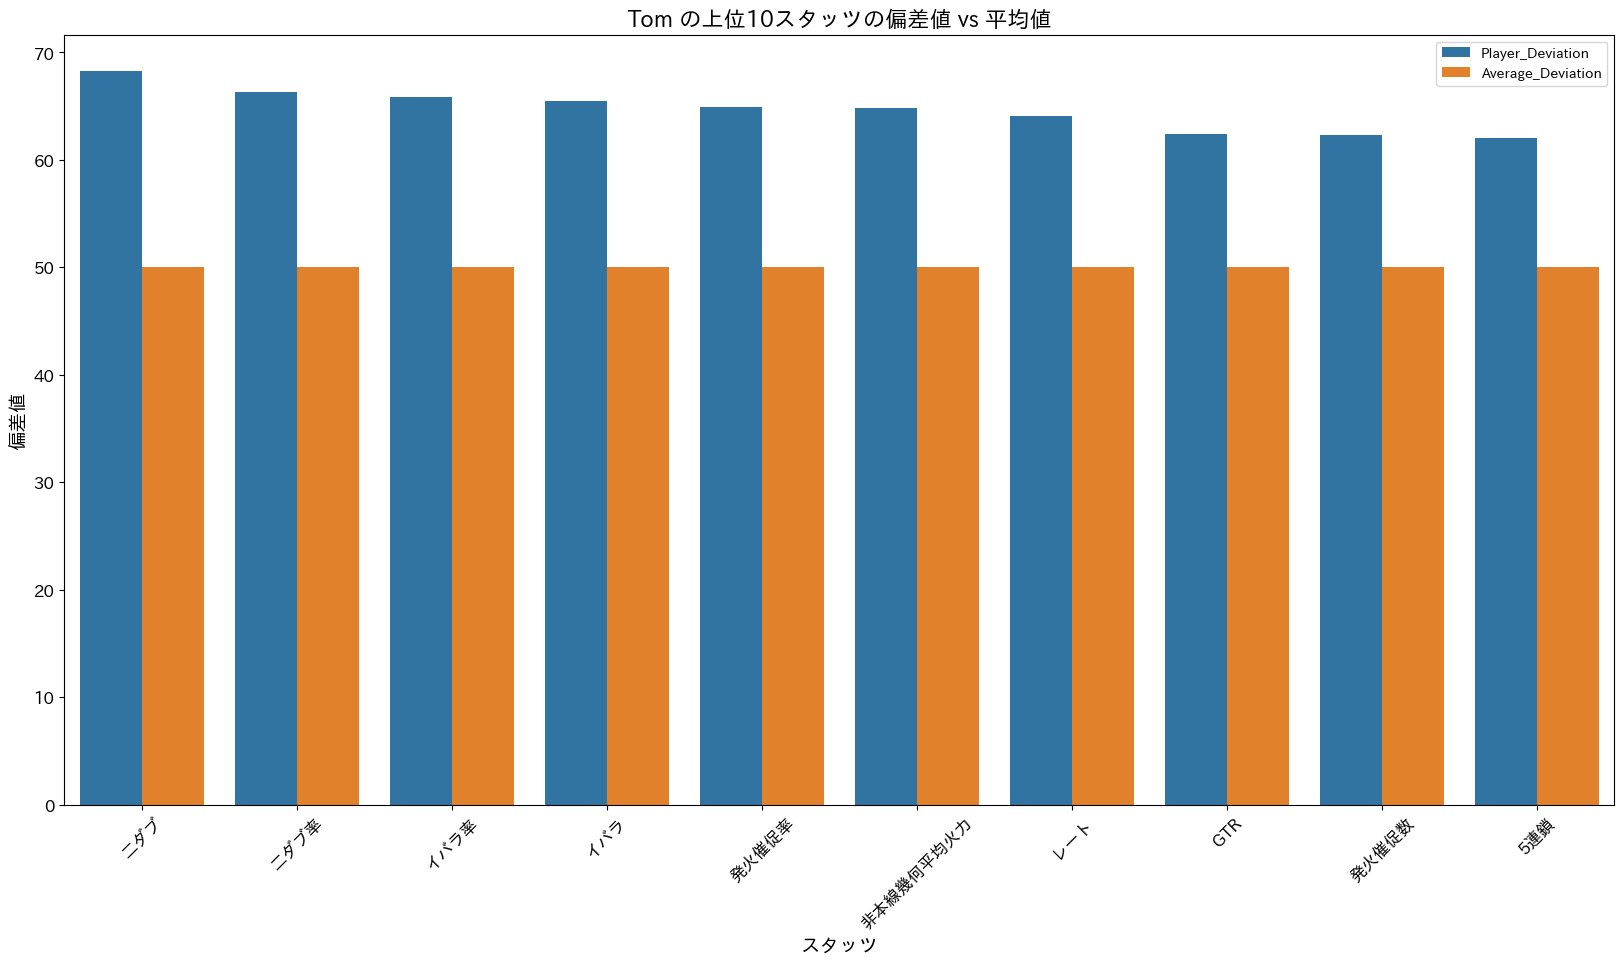

Tom の上位10スタッツ（偏差値順）:
         Stat Player_Deviation  Average_Deviation
76        二ダブ        68.236209               50.0
43       二ダブ率        66.323449               50.0
44       イバラ率        65.804761               50.0
74        イバラ        65.481989               50.0
53      発火催促率        64.913553               50.0
38  非本線幾何平均火力        64.861385               50.0
0         レート        64.058244               50.0
59        GTR        62.408834               50.0
52      発火催促数        62.345487               50.0
79        5連鎖        62.050846               50.0

選手のトップ10スタッツ（偏差値順）:
         Stat Player_Deviation  Average_Deviation
76        二ダブ        68.236209               50.0
43       二ダブ率        66.323449               50.0
44       イバラ率        65.804761               50.0
74        イバラ        65.481989               50.0
53      発火催促率        64.913553               50.0
38  非本線幾何平均火力        64.861385               50.0
0         レート        64.058244               50.0
59      

In [62]:
# 偏差値の計算関数
def calculate_deviation_score(df, column_mean, column_std):
    return 50 + 10 * (df - column_mean) / column_std

# 全スタッツの平均と標準偏差を計算
stats_mean = df_filtered.mean()
stats_std = df_filtered.std()

player_stats = df_stats[df_stats[player_column] == player_name].iloc[0]
player_stats_numeric = player_stats.drop(labels=[player_column])

# 選手の偏差値を計算
player_deviation = calculate_deviation_score(player_stats_numeric, stats_mean, stats_std)

# 平均値の偏差値（理論的には全て50）
average_deviation = calculate_deviation_score(stats_mean, stats_mean, stats_std)

# 比較用データフレームの作成
comparison_df = pd.DataFrame({
    'Stat': df_filtered.columns,
    'Player_Deviation': player_deviation.values,
    'Average_Deviation': average_deviation.values
})

# 上位k個のスタッツをソート
k = 10
top_k_stats = comparison_df.sort_values(by='Player_Deviation', ascending=False).head(k)

# データの整形
top_k_melted = top_k_stats.melt(id_vars='Stat', value_vars=['Player_Deviation', 'Average_Deviation'],
                                var_name='Category', value_name='Deviation_Score')

# 可視化
plt.figure(figsize=(20, 10))
sns.barplot(x='Stat', y='Deviation_Score', hue='Category', data=top_k_melted)
plt.title(f'{player_name} の上位{k}スタッツの偏差値 vs 平均値', fontsize=16)
plt.xlabel('スタッツ', fontsize=14)
plt.ylabel('偏差値', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='')
plt.show()

# 上位k個のスタッツを表示
print(f"{player_name} の上位{k}スタッツ（偏差値順）:")
print(top_k_stats[['Stat', 'Player_Deviation', 'Average_Deviation']])

# 全スタッツの偏差値ランキング
full_rankings = comparison_df.sort_values(by='Player_Deviation', ascending=False)

# トップ10とボトム10を表示
top_10 = full_rankings.head(10)
bottom_10 = full_rankings.tail(10)

print("\n選手のトップ10スタッツ（偏差値順）:")
print(top_10)

print("\n選手のボトム10スタッツ（偏差値順）:")
print(bottom_10)

ここでflexibleな特徴量を定義

In [82]:
Flexible_feature_value = ["二ダブ", "二ダブ率", "イバラ率", "イバラ"]

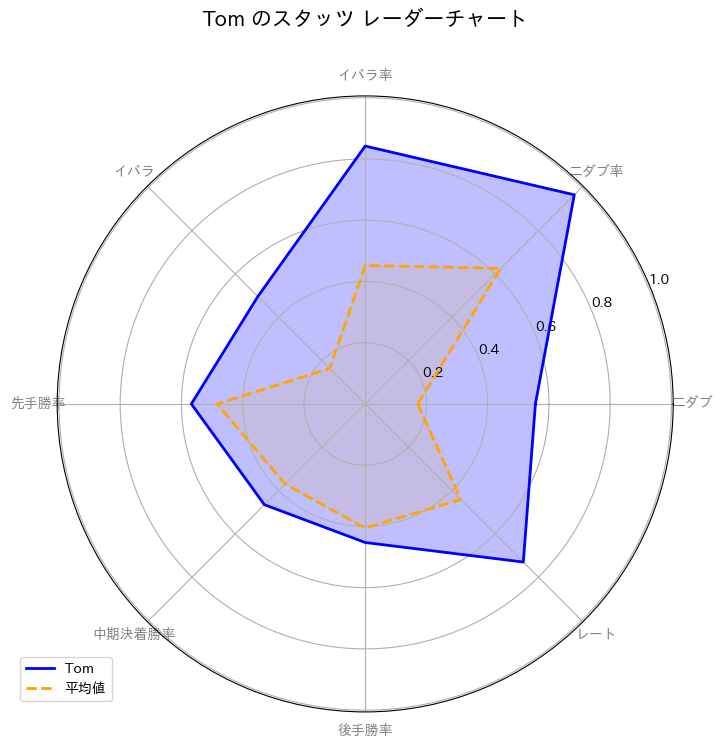

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_radar_chart(player_name, df_stats, df_filtered, flexible_features, fixed_features):
    """
    指定した選手のスタッツをレーダーチャートで可視化します。
    各特徴量は最小値と最大値を用いて正規化（Min-Maxスケーリング）されています。

    Parameters:
    - player_name (str): レーダーチャートを作成する選手の名前。
    - df_stats (pd.DataFrame): 選手のスタッツが含まれるデータフレーム。
    - df_filtered (pd.DataFrame): 選手名を除いた特徴量のみのデータフレーム。
    - flexible_features (list): 選手ごとに異なる特徴量のリスト。
    - fixed_features (list): 全選手共通の特徴量のリスト。

    Returns:
    - None: レーダーチャートを表示します。
    """

    # 使用する特徴量を統合
    selected_features = flexible_features + fixed_features

    # データ型の確認と数値型への変換
    df_stats[selected_features] = df_stats[selected_features].apply(pd.to_numeric, errors='coerce')
    df_filtered[selected_features] = df_filtered[selected_features].apply(pd.to_numeric, errors='coerce')

    # 欠損値の処理（必要に応じて）
    df_filtered = df_filtered.dropna(subset=selected_features)
    df_stats = df_stats.dropna(subset=selected_features)

    # 指定した特徴量でデータをフィルタリング
    try:
        player_stats = df_stats[df_stats[player_column] == player_name][selected_features].iloc[0]
    except IndexError:
        print(f"選手 '{player_name}' がデータフレームに見つかりません。名前を確認してください。")
        return

    # 平均値を計算
    stats_mean = df_filtered[selected_features].mean()

    # 各特徴量の最小値と最大値を計算
    stats_min = df_filtered[selected_features].min()
    stats_max = df_filtered[selected_features].max()

    # 正規化関数の定義
    def normalize(value, min_val, max_val):
        if max_val - min_val == 0:
            return 0  # スケールが0の場合は0を返す
        return (value - min_val) / (max_val - min_val)

    # 選手のスタッツを正規化（修正済み）
    player_normalized = [normalize(x, stats_min[feature], stats_max[feature]) 
                         for feature, x in zip(selected_features, player_stats)]
    player_normalized += player_normalized[:1]  # サイクルを閉じるために最初の値を追加

    # 平均値のスタッツを正規化（修正済み）
    mean_normalized = [normalize(x, stats_min[feature], stats_max[feature]) 
                       for feature, x in zip(selected_features, stats_mean)]
    mean_normalized += mean_normalized[:1]

    # カテゴリ（特徴量）のリスト
    categories = selected_features
    N = len(categories)

    # レーダーチャートの角度を計算
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # 完全なサイクルのために最初の角度を追加

    # プロットの設定
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # 選手のスタッツをプロット
    ax.plot(angles, player_normalized, linewidth=2, linestyle='solid', label=player_name, color='blue')
    ax.fill(angles, player_normalized, alpha=0.25, color='blue')

    # 平均値のスタッツをプロット
    ax.plot(angles, mean_normalized, linewidth=2, linestyle='dashed', label='平均値', color='orange')
    ax.fill(angles, mean_normalized, alpha=0.1, color='orange')

    # カテゴリのラベルを設定
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # ラベルとタイトル
    plt.title(f"{player_name} のスタッツ レーダーチャート", size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# レーダーチャートの作成
create_radar_chart(player_name, df_stats, df_filtered, Flexible_feature_value, Fixed_feature_values)
